# Impact Evaluation of Progresa using regression and tabular methods

Here, I will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. Refer to the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz regarding details on the program.

*This work is part of an assignment that I have completed as part of the "Data Science" curriculum.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Facilitating inline plotting
%matplotlib inline

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics



In [2]:
# loading the csv file into dataframe called 'progresa'
progresa = pd.read_csv('progresa_sample.csv')

# a look at the dataframe
progresa

year  sex  indig  dist_sec  sc  grc  fam_n    min_dist    dist_cap  \
0        97    0      0     4.473   1    7      7   21.168384   21.168384   
1        98    0      0     4.473   1    8      7   21.168384   21.168384   
2        97    1      0     4.473   1    6      7   21.168384   21.168384   
3        98    1      0     4.473   1    7      7   21.168384   21.168384   
4        97    0      0     4.473   1    2      7   21.168384   21.168384   
5        98    0      0     4.473   1    3      7   21.168384   21.168384   
6        97    0      0     3.154   0    6      6  127.114780  154.196003   
7        98    0      0     3.154   0    6      6  127.114780  154.196003   
8        97    1      0     3.373   1    2      5   85.300272  105.878669   
9        98    1      0     3.373   1    2      5   85.300272  105.878669   
10       97    0      0     3.373   1    2      5   85.300272  105.878669   
11       98    0      0     3.373   1    3      5   85.300272  105.878669   
12       97    0      0     3.373 NaN    0      5   85.300272  105.878669   
13       98    0      0     3.373   1    1      5   85.300272  105.878669   
14       97    1      1     1.935   1    2      5  127.657608  333.048731   
15       98    1      1     1.935   1    3      5  127.657608  333.048731   
16       97    0      1     1.935   1    2      5  127.657608  333.048731   
17       98    0      1     1.935   1    3      5  127.657608  333.048731   
18       97    1      1     1.935   1    5     10  127.657608  333.048731   
19       98    1      1     1.935   0    6     10  127.657608  333.048731   
20       97    0      1     1.935   1    3     10  127.657608  333.048731   
21       98    0      1     1.935   1    6     10  127.657608  333.048731   
22       97    0      1     1.935   1    2      7  127.657608  333.048731   
23       98    0      1     1.935   1    3      7  127.657608  333.048731   
24       97    1      1     1.935   1    1      7  127.657608  333.048731   
25       98    1      1     1.935   1    2      7  127.657608  333.048731   
26       97    0      1     1.935   1    3      5  127.657608  333.048731   
27       98    0      1     1.935   1    3      5  127.657608  333.048731   
28       97    1      1     1.935   0    6      9  127.657608  333.048731   
29       98    1      1     1.935 NaN  NaN      9  127.657608  333.048731   
...     ...  ...    ...       ...  ..  ...    ...         ...         ...   
77220    97    0      1     3.148   0    4     13  137.473203  172.770829   
77221    98    0      1     3.148 NaN  NaN     13  137.473203  172.770829   
77222    97    0      1     3.148   0    4     13  137.473203  172.770829   
77223    98    0      1     3.148 NaN  NaN     13  137.473203  172.770829   
77224    97    0      1     3.148   1    4     13  137.473203  172.770829   
77225    98    0      1     3.148   1    1     13  137.473203  172.770829   
77226    97    1      1     3.148   1    3     13  137.473203  172.770829   
77227    98    1      1     3.148   1    3     13  137.473203  172.770829   
77228    97    0      1     3.148 NaN    0      3  137.473203  172.770829   
77229    98    0      1     3.148   0    3      3  137.473203  172.770829   
77230    97    0      1     3.148   1    4     16  137.473203  172.770829   
77231    98    0      1     3.148   0    4     16  137.473203  172.770829   
77232    97    0      1     3.148   1    2     16  137.473203  172.770829   
77233    98    0      1     3.148   1    2     16  137.473203  172.770829   
77234    97    1      1     3.148   1    2      8  137.473203  172.770829   
77235    98    1      1     3.148   1    2      8  137.473203  172.770829   
77236    97    0      1     3.148   1    1      8  137.473203  172.770829   
77237    98    0      1     3.148   1    2      8  137.473203  172.770829   
77238    97    1      1     3.148   1    1      8  137.473203  172.770829   
77239    98    1      1     3.148   1    2      8  137.473203  172.770829   
772

In [3]:
# Create a table which holds aggregation as means of all variables
progresa_mean= pd.DataFrame(progresa.mean())

# renaming the columns
progresa_mean.rename(columns = {0:'Mean'}, inplace=True)
progresa_mean.columns.name='Variables'

# creating a column for standard deviation using std() function
progresa_mean['Standard Deviation']=pd.DataFrame(progresa.std())

# dropping irrelevant variables
progresa_mean=progresa_mean.drop(['year','folnum','village'],axis=0)

# sorting variables for presentation
progresa_mean.sort_index(inplace=True)

# displaying the new table with means and standard deviations of all variables
progresa_mean

Variables            Mean  Standard Deviation
age             11.366460            3.167744
dist_cap       147.674452           76.063134
dist_sec         2.418910            2.234109
fam_n            7.215715            2.352900
grc              3.963537            2.499063
grc97            3.705372            2.572387
hohage          44.436717           11.620372
hohedu           2.768104            2.656106
hohsex           0.925185            0.263095
hohwag         586.985312          788.133664
indig            0.298324            0.457525
min_dist       103.447520           42.089441
sc               0.819818            0.384342
sc97             0.813922            0.389172
sex              0.512211            0.499854
welfare_index  690.346564          139.491130



The table above holds means and standard deviations of all variables, presented in an alphabetical order. 
Means were calculated using the mean() function while standard deviations were computed from the std() function.

_________________________________________

### 1.2 Exploring Differences at baseline

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? 

In [4]:
# creating a table holding observations for poor at baseline(1997)
progresa_pr_bl= progresa[(progresa['poor']=='pobre') & (progresa['year']==97)]

# the poor baseline observations are split into control and treatment
# a table holding values for control villages (progresa=0)
progresa_pr_bl_c=progresa_pr_bl[progresa_pr_bl['progresa']=='0']
# a table holding values for control villages (progresa='basal')
progresa_pr_bl_t=progresa_pr_bl[progresa_pr_bl['progresa']=='basal']


In [5]:
# computing average of characteristics for control and treatment villages
prog_bl_mean=progresa_pr_bl.groupby(progresa_pr_bl['progresa']).mean()
# transposing table for better presentation
prog_bl_mean=prog_bl_mean.T

# creating two columns to hold t-statistics and p-va;ues
prog_bl_mean['diff']=prog_bl_mean['basal']
prog_bl_mean['t']=prog_bl_mean['basal']
prog_bl_mean['p']=prog_bl_mean['basal']


# dropping irrelevant variables
prog_bl_mean=prog_bl_mean.drop(['year','folnum','village'],axis=0)

# sorting variables alphabetically
prog_bl_mean.sort_index(inplace=True)

# computing t=statistic and p-values for each variable
for item in prog_bl_mean.index:
    # the p-value tells us how significant the difference is
    prog_bl_mean['diff'][prog_bl_mean.index==item]=(prog_bl_mean['basal']) - (prog_bl_mean['0'])
    # the t-statistic is used to check for differences in means of control an treatment village characteristics
    prog_bl_mean['t'][prog_bl_mean.index==item]=stats.ttest_ind(progresa_pr_bl_c[item].dropna(),progresa_pr_bl_t[item].dropna())[0]
    # the p-value tells us how significant the difference is
    prog_bl_mean['p'][prog_bl_mean.index==item]=stats.ttest_ind(progresa_pr_bl_c[item].dropna(),progresa_pr_bl_t[item].dropna())[1]
    

# renaming the columns as per our needs    
prog_bl_mean.columns=['Average Value (Control Villages)','Average Value (Treatment Villages)','Difference(Treat - Control)','t-score','p-value']
prog_bl_mean.columns.name='Variable Name'

# viewing the table with t-statistics and p-values
prog_bl_mean

Variable Name  Average Value (Control Villages)  \
age                                   10.742023   
dist_cap                             153.769730   
dist_sec                               2.507662   
fam_n                                  7.302469   
grc                                    3.543050   
grc97                                  3.543050   
hohage                                44.276918   
hohedu                                 2.590348   
hohsex                                 0.922947   
hohwag                               573.163558   
indig                                  0.332207   
min_dist                             103.237854   
sc                                     0.815186   
sc97                                   0.815186   
sex                                    0.505052   
welfare_index                        659.579100   

Variable Name  Average Value (Treatment Villages)  \
age                                     10.716991   
dist_cap                               150.829074   
dist_sec                                 2.453122   
fam_n                                    7.281327   
grc                                      3.531599   
grc97                                    3.531599   
hohage                                  43.648828   
hohedu                                   2.663139   
hohsex                                   0.924656   
hohwag                                 544.339544   
indig                                    0.325986   
min_dist                               107.152915   
sc                                       0.822697   
sc97                                     0.822697   
sex                                      0.519317   
welfare_index                          655.428377   

Variable Name  Difference(Treat - Control)   t-score       p-value  
age                              -0.025032  0.708630  4.785594e-01  
dist_cap                         -2.940656  3.339081  8.415005e-04  
dist_sec                         -0.054540  2.100433  3.569843e-02  
fam_n                            -0.021142  0.794167  4.271039e-01  
grc                              -0.011450  0.400196  6.890151e-01  
grc97                            -0.011450  0.400196  6.890151e-01  
hohage                           -0.628090  4.775962  1.796243e-06  
hohedu                            0.072791 -2.541229  1.105093e-02  
hohsex                            0.001709 -0.566312  5.711858e-01  
hohwag                          -28.824015  3.594588  3.253835e-04  
indig                            -0.006222  1.161714  2.453603e-01  
min_dist                          3.915060 -8.206584  2.358312e-16  
sc                                0.007511 -1.668745  9.517806e-02  
sc97                              0.007511 -1.668745  9.517806e-02  
sex                               0.014265 -2.506686  1.219172e-02  
welfare_index                    -4.150723  3.188594  1.431016e-03

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

**Answer A**

At baseline there are significant differences between treatment and control villages for the following characteristics: 

* dist_cap
* dist_sec
* hohage
* hohedu
* hohwag
* min_dist
* welfare_index

**Answer B**

Ideally, in a well randomized experiment, there should be no differences in average characteristics at baseline. If there are differences, it means that the randomization has not been done perfectly, i.e. there is some trend in characteristics between the treatment and control groups. 
For example, if the experiment is well randomized, the average age of both groups will not have a statistically significant difference. If there is a difference it means that a group of certain age group has more (or less) priority in being chosen as part of treatment/ control.
In order for impact to be correctly measured, we need the data to be well randomized, which means the averages should not have a significant difference.
However, as we see in this case, it may not always be practical to achieve such true randomization.

**Answer C**

We see that quite a few demographic charateristics are significantly different for treatment and control groups at baseline. This implies that a simple difference after treatent between control/treatment groups to judge impact will not yield a correct impact evaluation, rather a pre vs. post or even better double difference method should be applied to assess the impact of treatment.

### 1.4 Graphical exploration, part 1


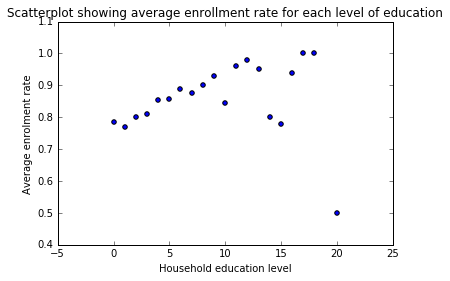

In [6]:
# grouping all observations by household head education and calculating average characteristics at each level
progresa_hohedu_enr=progresa_pr_bl.groupby(progresa_pr_bl['hohedu']).mean()

# creating the scatterplot of household head education vs. enrollment rate
plt.scatter(progresa_hohedu_enr.index,progresa_hohedu_enr.sc)
# setting axes labels
plt.xlabel("Household education level")
plt.ylabel("Average enrolment rate")
# printing scatterplot title
plt.title("Scatterplot showing average enrollment rate for each level of education")
# printing the plot
plt.show()

From the scatterplot above we see that the enrolment is generally increasing with increasing household head education, that is to say that before progresa was introduced, in poor households, the chances of enrollments of children in school were higher in those households where the head of the household was more educated. However, despite this we do see some outliers. The enrolment for 'hohedu=20' is the least, and education levels 16, 15 and 11 also show deviation from the trend. 

Next, I try to explore why this may be a case. 

In the following plot, I create a scatteplot with a third variable accounting for the size of the group. 

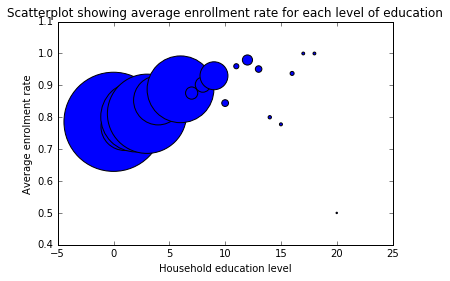

In [7]:
# creating the scatterplot of household head education vs. enrollment rate
# third variable depicted by size is the count of the observations in each group
plt.scatter(progresa_hohedu_enr.index,progresa_hohedu_enr.sc, s= progresa_pr_bl.groupby(progresa_pr_bl['hohedu']).size())
# setting axes labels
plt.xlabel("Household education level")
plt.ylabel("Average enrolment rate")
# printing scatterplot title
plt.title("Scatterplot showing average enrollment rate for each level of education")
# printing the plot
plt.show()

Here we see that the outlier is an extremely small group of observations (relative to the other groups). As the groups showing deviations from the trends are all relatively smaller, and as for majority of the observations the trend does hold true, we can assume that these smaller groups are indeed outliers and may be ignored as these will not significantly bias results.

### 1.5 Graphical exploration, part 2


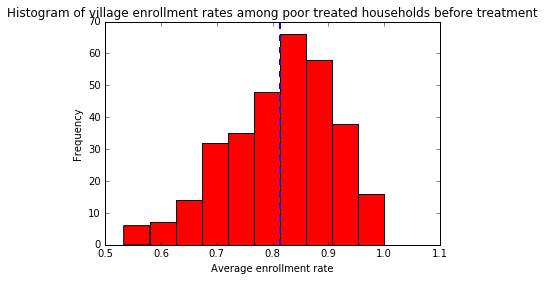

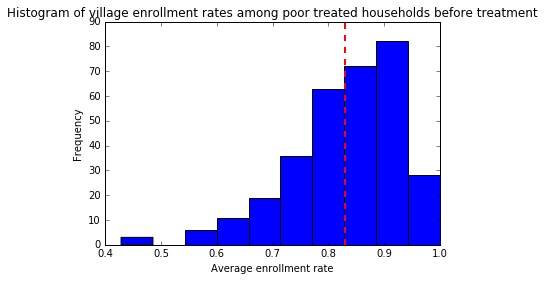

In [8]:
# creating a table for poor treated households at baseline
progresa_pr_t_97=progresa[(progresa['poor']=='pobre') & (progresa['progresa']=='basal') & (progresa['year']==97)]
# grouping by village and calculating average characteristics for each village
x=progresa_pr_t_97.groupby(['village']).mean()

# creating a table for poor treated households after treatment
progresa_pr_t_98=progresa[(progresa['poor']=='pobre') & (progresa['progresa']=='basal') & (progresa['year']==98)]
# grouping by village and calculating average characteristics for each village
y=progresa_pr_t_98.groupby(['village']).mean()

# creating figure 1 (before treatment)
plt.figure(1)
# plotting histogram of distribution of enrolment in villages before treatment
plt.hist(x['sc'].values, color='red')
# plotting vertical line through mean
plt.axvline(x['sc'].mean(), color='b', linestyle='dashed', linewidth=2)
# setting axes labels
plt.xlabel("Average enrollment rate")
plt.ylabel("Frequency")
# printing scatterplot title
plt.title("Histogram of village enrollment rates among poor treated households before treatment")

# creating figure 2 (after treatment)
plt.figure(2)
# plotting histogram of distribution of enrolment in villages after treatment
plt.hist(y['sc'].values, color='blue')
# plotting vertical line through mean
plt.axvline(y['sc'].mean(), color='r', linestyle='dashed', linewidth=2)
# setting axes labels
plt.xlabel("Average enrollment rate")
plt.ylabel("Frequency")
# printing scatterplot title
plt.title("Histogram of village enrollment rates among poor treated households before treatment")

We see in the histograms that the average enrollment has increased from 1997 to 1998. Not only has the mean enrolment across villages increased, the histogram has become left skewed, suggesting that enrollment rates have increased after treatment for poor households. 

However, to verify these claims, I plot both histograms on the same scale below to draw a comparison.

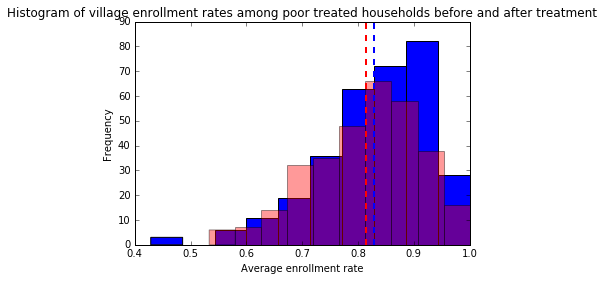

In [9]:
# plotting histogram for treated villages in 1998
plt.hist(y['sc'].values, color='blue')
plt.axvline(x['sc'].mean(), color='r', linestyle='dashed', linewidth=2)
# plotting histogram for treated villages in 1997
plt.hist(x['sc'].values, alpha=0.4, color='red')
plt.axvline(y['sc'].mean(), color='b', linestyle='dashed', linewidth=2)
# setting axes labels
plt.xlabel("Average enrollment rate")
plt.ylabel("Frequency")
# printing scatterplot title
plt.title("Histogram of village enrollment rates among poor treated households before and after treatment")

In [10]:
# difference in average enrollments
d= (y['sc'].mean()) - (x['sc'].mean ())
# checking for significance of difference
t= stats.ttest_ind(y['sc'].dropna(),x['sc'].dropna())

# printing the differences between enrollments in 1998 and 1997
print "Differences between averages: ", d
print "T-statististic: ", t[0]
print "p-value: ", t[1]

Differences between averages:  0.0156967932034
T-statististic:  2.01571348652
p-value:  0.0442487003657


From the graphs and the t-test results we see that there is a 0.015 difference between enrollment rates in 1998 and 1997. The t-test tell us that at p-value 0.04, this difference is significant (assuming 0.05 to be threshold of statistical significance), suggesting that there seems to be a significant impact when evaluating impact of progresa before and after treatment was introduced to the treatment group (pre vs. post method).

## Part 2: Measuring Impact



### 2.1 Simple differences: T-test


In [11]:
# creating a dataset of observations of poor households in 1998
progresa_98=progresa[(progresa['year']==98) & (progresa['poor']=='pobre')]
# computing average enrolment for each of the groups (control/treatment)
avg=progresa_98.groupby(progresa['progresa']).mean().sc

# printing average enrollments for each group
print "Average enrolment for control villages: ", avg[0]
print "Average enrolment for treatment villages: ", avg[1]
# computing the difference (simple difference)
print "Difference between treatment and control averae enrollments: ", avg[1]-avg[0]

Average enrolment for control villages:  0.80763695673
Average enrolment for treatment villages:  0.846479121395
Difference between treatment and control averae enrollments:  0.0388421646651


In [12]:
# using a t-test to see if this difference is statistically significant

# x holds data for control households in 1998
x=progresa_98.groupby(progresa['progresa']).get_group('0')
# y holds data for control households in 1998
y=progresa_98.groupby(progresa['progresa']).get_group('basal')
# t statistic to determine difference between treatment and control enrollments in 1998
t=stats.ttest_ind(y['sc'].dropna(),x['sc'].dropna())

# printing results
print "T-statististic: ", t[0]
print "p-value: ", t[1]

T-statististic:  8.35872056742
p-value:  6.63634444752e-17




From the test above I see that there is a difference between control and treatment group after treatment was introduced. This difference was computed to be 0.0388. At p-value 6.63634444752e-17, we can say that after running the t-test we see that the difference between enrollments after treatment were highly significant, i.e. the probability of not witnessing an impact in this simple difference method is extremely low.

We can then say that if we consider the data only after treatment, there indeed was a significant increase in enrollments for households that were a part of progresa treatment from those that were not.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [13]:
# dropping records with one or many null values so as to not compromise regression model
progresa_98_d=progresa_98.dropna(subset=['sc','progresa'])
# progresa holds 0 for control and 1 for treatment to facilitate regression
progresa_98_d['progresa']=[1 if i=='basal' else 0 for i in progresa_98_d['progresa'] ]

# performing ordinary least squares regression of treatment on enrolment
results = smf.ols('sc ~ progresa', data=progresa_98_d).fit()
# printing summary
print results.summary()
# printing p-values
print results.pvalues
print results.bse

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 26 Jan 2016   Prob (F-statistic):           6.64e-17
Time:                        06:09:36   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Answer**

* According to this model, progresa increased chances of enrollment of students in poor households by 0.0388
* We observe that the values we observe through regression are exactly the same as those computed in 2.1 above. The t-score is 8.359 and the p-value is 6.636344e-17 and the difference in average enrollments between treatment and control groups is 0.0388.
* The null hypothesis here is that progresa does not have any effect on enrollments for treated households, i.e. the treatment effect ('progresa' coefficient) is 0. This means that the coefficient of 'progresa' would be non-significant, i.e. the p-value for this coefficient would be greater that 0.05. However at 6.636344e-17, the p-value << 0.05, thus rejecting the null hypothesis that progresa does not have any effect on enrollments for treated households. In other words the probability of the treatment having zero effect (coefficient of progresa=0) is 6.636344e-17 which is extremely small. 
* The counterfactual assumption underlying this regression is that had progresa not been introduced, the average enrollment of households in the treatment group would be the same as the currently observed average enrollment in households in the control group. The average enrollment of control group households is the intercept in this case, i.e. 0.8076. Hence, we can say that in the absence of treatment, the treated households would have shown an average enrollment of 0.8076 or 80.76%.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [14]:
# dropping records with one or many null values so as to not compromise regression model
progresa_98_m=progresa_98.dropna(subset=['sc','progresa','sex','hohedu','hohage','hohsex','indig','min_dist'])
# progresa holds 0 for control and 1 for treatment to facilitate regression
progresa_98_m['progresa']=[1 if i=='basal' else 0 for i in progresa_98_m['progresa'] ]

# performing ordinary least squares regression
results = smf.ols('sc ~ progresa + sex + hohage + hohedu + hohsex + indig + min_dist', data=progresa_98_m).fit()
# printing summary
print results.summary()
# printing p-values
print results.pvalues
print results.bse

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     111.1
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          2.59e-161
Time:                        06:09:37   Log-Likelihood:                -11544.
No. Observations:               27333   AIC:                         2.310e+04
Df Residuals:                   27325   BIC:                         2.317e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7803      0.015     52.169      0.0

C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Answer**

* We see that the point effect of treatment is 0.0357 in the presence of control variables as compared to 0.0388 when these are not present. This means that these control variables have some effect on treatment as they are causing an overestimation of the treatment estimate when control variables are not considered.
* The standard error reduced from 0.04647 in the previous case where control variables were ignored to 0.04610 when they were considered. This means that the range within which the treatment effect is accurately estimated is smaller once we take thse variables into account, i.e. the effect is better estimated.
* Between 2.2 and 2.3 the effect of treatment has changed as explained above. However, the standard error has reduced and so has the p-alue fr treatment coefficient, suggesting that the regression model in 2.3 is a better model to assess progresa's impact. The intercept in 2.2 was 0.807 implying that in the absence of treatment, on average there would be 80.7% enrollment. In 2.3, the intercept is smaller at 0.78 implying that in the absence of consideration of ontrol variables the counterfactual was overestimated as well. Looking at the p-values of the 6 variables I considered, I see that all these 6 variables have a significant effect on enrollment for poor households.

### 2.4 Difference-in-Difference, version 1 (tabular)

An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [15]:
# dataset of poor households in treatment group
progresa_t= progresa[(progresa['progresa']=='basal') & (progresa['poor']=='pobre')]
# dataset of poor households in control group
progresa_c= progresa[(progresa['progresa']=='0') & (progresa['poor']=='pobre')]

# average values for treatment group
progressa_diff_t=progresa_t.groupby('year').mean()
# printing average enrollments before and after
print progressa_diff_t.sc

# printing difference of average enrollments before and after
x=progressa_diff_t.sc[progressa_diff_t.index==98].values[0]-progressa_diff_t.sc[progressa_diff_t.index==97].values[0]
print "Difference between average enrollment before and after progresa: ", x

year
97    0.822697
98    0.846479
Name: sc, dtype: float64
Difference between average enrollment before and after progresa:  0.023782233992


**Answer**
First the difference for treatment group was computed, i.e. the difference in enrollment for treated households before and after treatment. This was found to be 0.0238.

This is of the form: 
Enrollment of treated households in 1998 - Enrollment of treated households in 1997

In [16]:
# average values for control group
progressa_diff_c=progresa_c.groupby('year').mean()

# printing average enrollments before and after
print progressa_diff_c.sc
# printing difference of average enrollments before and after
y=progressa_diff_c.sc[progressa_diff_c.index==98].values[0]-progressa_diff_c.sc[progressa_diff_t.index==97].values[0]
print "Difference between average enrollment before and after progresa: ", y

year
97    0.815186
98    0.807637
Name: sc, dtype: float64
Difference between average enrollment before and after progresa:  -0.00754904632728


**Answer**
Next difference was computed for control group, i.e. how did enrollment rates change for households in control group within the interval during which their counterparts were treated. This was found to be -0.0075, i.e. enrollment decreased for poor households between 1997 and 1998 in case they were not treated.

This is of the form: 
Enrollment of control households in 1998 - Enrollment of control households in 1997

For calculating difference in difference, we calculate the difference between these two difference values we just computed. 

In [17]:
# computing the difference in difference
x-y

0.031331280319323085

**Answer**
Difference in difference is calculated as below: 
(Enrollment of control households in 1998 - Enrollment of control households in 1997) - (Enrollment of control households in 1998 - Enrollment of control households in 1997)

or, x - y, as demonstrated above. This value was found to be 0.0313, implying that the impact of progresa for treated households over the period 97-98 was 0.313, or in other words introduction of progresa led to an additional 3.13% enrollment rate.

* The impact evaluated from the difference in difference method is 0.0313 as compared to 0.0388 that we saw in the simple difference method, and 0.0357 as we say in simple difference with control variables. This means that the trend in control variables was not taken into account and led to an overestimation of progresa's impact when using the previous methods. 
* The counterfactual assumption in this model is that in the absence of treatment the households which are now a part of the treatment group would have followed the same trend as the households in the control group, i.e., the difference between average  enrollment rates for the treatment group between 1997 and 1998 would be the same as that of control group households between 1997 and 1998, or x = y, where x = (T98-T97) and y = (C98-C97).

*Here T98 and T97 are average enrollment rates for the treatment group in 1998 and 1997 respectively 
C98 and C97 are average enrollment rates for the control group in 1998 and 1997 respectively* 

### 2.5 Difference-in-Difference, version 1 (regression)



In [18]:
# taking only poor records
progresa_pr=progresa[progresa['poor']=='pobre']
# dropping records with one or many null values so as to not compromise regression model
progresa_diff_reg=progresa_pr.dropna(subset=['sc','progresa','sex','hohedu','hohage','hohsex','indig','min_dist'])
# progresa holds 0 for control and 1 for treatment to facilitate regression
progresa_diff_reg['progresa']=[1 if i=='basal' else 0 for i in progresa_diff_reg['progresa']]
# progresa holds 0 for 1997 (pre) and 1 for 1998 (post) to facilitate regression
progresa_diff_reg['post']=[1 if i==98 else 0 for i in progresa_diff_reg['year']]

#Performing ordinary least squares regression
results = smf.ols('sc ~ progresa + sex + hohage + hohedu + hohsex + indig + min_dist + post + post*progresa'
                  , data=progresa_diff_reg).fit()
#Printing summary
print results.summary()
print results.pvalues
print results.bse

C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     167.8
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          1.34e-315
Time:                        06:09:53   Log-Likelihood:                -25463.
No. Observations:               58150   AIC:                         5.095e+04
Df Residuals:                   58140   BIC:                         5.104e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.7976      0.011     74.761


* The estimated impact of progresa is given by the coefficient of the interaction variable 'post\*progresa'. This is found to be 0.0316. This means that the impact of progresa is that the average enrollment rate increased by 3.16% with a standard error of 0.004403 implying that average enrollment increased 0.0316 with a possibility of deviation of 0.004403 or 0.4% on either side.
* The estimate from simple difference method at 0.0357 was much higher as it did not account for the cunterfactual trend, i.e. the trend in the control group where there was no involvement of progresa. Thus at 0.0316, the smaller impact is a more reliable estimate as it does take into account both differences- over time and treatment vs. control. 
* The difference in difference computed in 2.4 did not take into account any control variables and was calculated to be 0.0313, i.e. if all other variables were ignored, we estimated progresa's impact on average enrollment rates to be 0.0313. However, on considering the control variables we find that the difference in difference estimate was being underestimated and that it computes to 0.0316. At standard error 0.0064 and 8.400364e-07, this double difference gives us an estimate with a fairly small chance of error.
* The counterfactual assumption here is that in the absence of treatment, the average enrollment rate for the treated households would have increased by the same amount as the average enrollment rate increase which is observed for control group post treatment, i.e. in 1998.

### 2.6 Difference-in-Difference, version 2

An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages.

In [22]:
# taking 1998 records
progresa_98=progresa[progresa['year']==98]
# setting appropriate values for 'is_poor'
progresa_98['is_poor']=[1 if i=='pobre' else 0 for i in progresa_98['poor']]
# dropping records with one or many null values so as to not compromise regression model
progresa_diff_reg=progresa_98.dropna(subset=['sc','progresa','sex','hohedu','hohage','hohsex','indig','min_dist','is_poor'])
# progresa holds 0 for control and 1 for treatment to facilitate regression
progresa_diff_reg['progresa']=[1 if i=='basal' else 0 for i in progresa_diff_reg['progresa']]


#Performing ordinary least squares regression
results = smf.ols('sc ~ progresa + sex + hohage + hohedu + hohsex + indig + min_dist + is_poor + is_poor*progresa', data=progresa_diff_reg).fit()
#Printing summary
print results.summary()
print results.pvalues


C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          3.20e-207
Time:                        06:32:29   Log-Likelihood:                -13835.
No. Observations:               31968   AIC:                         2.769e+04
Df Residuals:                   31958   BIC:                         2.777e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.7611      0.017  


* To estimate the treatment effect for this model using regression we need a variable 'is_poor', which determines if the household falls under the poor (pobre) category or not. This can then be modelled on the regression equation: Y = i + a\*progresa + b\*is_poor + c\*progresa\*is_poor + e. Here i+b+e is the average enrollment rate for a poor household within control, i+a+b+c+e is the average enrollment rate for a poor household within treatment, i+a+e is the average enrollment rate for a non-poor household within treatment and i+e is the average enrollment rate for a non-poor household within control. Hence to compare the changes in enrollment between poor and non-poor across treatment and control we need to take a double difference such as: 

        Difference-in-difference = (poor treatment - poor control) - (non poor treatment - non poor control)
                         = ((i+a+b+c+e)-(i+b+e)) - ((i+a+e)-(i+e))
                         = (a+c) - (a) 
                         = c
        So we conclude that impact across treatment and control between poor and non-poor households is given by the coefficient c, in this case, this value is 0.006, which means that average enrollment rates for poor households that were treated is more than the average enrollment for non poor households that were in the control group. However, the p-value suggests that this is not a statistically significant change, hence we cannot establish a relationship here between enrollment rates across treatment and control groups based on whether the households are poor or not.

* The counterfactual assumption in this case would be that in the absence of treatment, the poor treated groups would have the same average enrollment rate increase as that of the non-poor households.

* The estimates above were more reliable as they were statistically significant, however in this case we cannot establish an estimate. We saw earlier that there is a significant increase in average enrollment rates between tratment and control groups over time. However, we cannot say that this increase was more significant for the poor as compared to the non-poor.

* The reason for this anomaly is probably because these households might be lying at the threshold of poverty, i.e. despite some being poor and the other being non-poor, other variables and conditions might not be very different in both cases. Thus, in such a case we would not see a significant difference in the treatment and control groups. Both poor and non-poor households may exhibit a similar change in enrollment rates on introduction of treatment. 

### 2.7 Spillover effects 

In [23]:
# taking only non poor records
progresa_pr=progresa[progresa['poor']!='pobre']
# dropping records with one or many null values so as to not compromise regression model
progresa_diff_reg=progresa_pr.dropna(subset=['sc','progresa','age','sex','hohedu','hohage','hohsex'])
# progresa holds 0 for control and 1 for treatment to facilitate regression
progresa_diff_reg['progresa']=[1 if i=='basal' else 0 for i in progresa_diff_reg['progresa']]
# progresa holds 0 for baseline (1997) and 1 for post treatment (1998)
progresa_diff_reg['post']=[1 if i==98 else 0 for i in progresa_diff_reg['year']]

#Performing ordinary least squares regression
results = smf.ols('sc ~ progresa + age + sex + hohage + hohedu + hohsex + post + post*progresa', data=progresa_diff_reg).fit()
#Printing summary
print results.summary()
print results.pvalues

C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\btm\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     498.3
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        06:34:17   Log-Likelihood:                -3768.4
No. Observations:               10423   AIC:                             7555.
Df Residuals:                   10414   BIC:                             7620.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4800      0.026     56.361



*A: * Progresa might have impacted non-poor households as an increase in enrollments from poor households may lead to lower infrastructure quality in schools if they are not well equipped for the increase.
Another reason could be that the non-poor (especially those near threshold) might have been demotivated as a result of not being a part of the program and thus would not have tried actively to enrol their children.
A third reason could be the manipulation of the system by the non-poor misrepresenting their wealth to get in on the program. This would lead to an increase in enrollment in the non-poor if progresa were really motivating enrollment.

*B: * Despite the possibilities listed above, by running a similar regression as before we see that the increase in average enrollment rates for the non-poor is highly statistically *insignificant*, thus implying that there was no signifcant spillover effects observed.

### 2.8 Summary



From the analysis above I observed the following: 

* There was a statistically significant difference between treatment and control groups' average enrollment rates in 1998 after progresa had been introduced. 
* However, at baseline there were some significant differences between these groups as well. These might as well have led to the difference in 1998. To assess this, I also tried the pre vs. post method.
* In this method as well, a statistically significant difference between treatment and control groups' average enrollment rates was observed. 
* The problem with this approach is that we cannot be sure if in the absence of treatment the same trend would not have been observed.
* Thus we see that in order to evaluate the impact one needs to consider both- effects between control/treatment groups and effects before/after treatment.
* Even this method is not free of limitations. We cannot say for certain whether control and treatment groups follow parallel trends between 1997 and 1998.

To solve these problems the difference in difference method was tried. This accounts for both the simple differences methods. From my findings of this method, I realized that there was indeed a statistically significant difference between treatment and control groups' average enrollment rates from 1997 to 1998. 

However in order to imply that there is in fact a causal effect of progresa on school enrollment, certain assumptions have to be made.

Firstly, the randomization would have to be assumed to be perfect. 
Secondly, we only have data from 1997 and 1998. In order to assess the trends and establish the existence of parallel (or not) trends we would have to analyse data at multiple points in time.

In conclusion, we do not have enough data to suggest a causal impact of progresa on enrollment simply with the dataset that was given.

Further, ignoring control variables did cause me to overestimate the effect of progresa, but a better estimate was produced when control variables were also taken into account. I also noted that there were no significant changes for non-poor households implying that the effect of Progresa was majorly for poor households alone.

Overall, the findings do not suggest a causal impact of Progresa on average enrollment rates for poor households. However, if we do make an assumption that the randomization was done perfectly, a stronger case for causality can be made.